In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#zaczytanie danych
train = pd.read_csv(r"C:\Users\AntoSzu\Downloads\data_green\train_green.csv")
test = pd.read_csv(r"C:\Users\AntoSzu\Downloads\data_green\test_green.csv")
#w zadaniu 2 X to predykcja z modelu
X_train = train['PRED']
y_train = train['TARGET']
X_test = test['PRED']
y_test= test['TARGET']

## MARGINAL

In [2]:
#conformity scores dla zbioru kalibracyjnego
conformity_scores = np.maximum(X_train-y_train, y_train-X_train)
#zadany poziom alpha
alpha = 0.1
#liczność próby
n = len(X_train)
#kwantyl scorów
qhat = np.quantile(conformity_scores, np.ceil((n+1)*(1-alpha))/n)
#regresja dla zbioru testowego
#przedział jedynie dla unikatowych wartości predykcji
x = np.unique(X_test)
output = np.array([x-qhat,x+qhat])

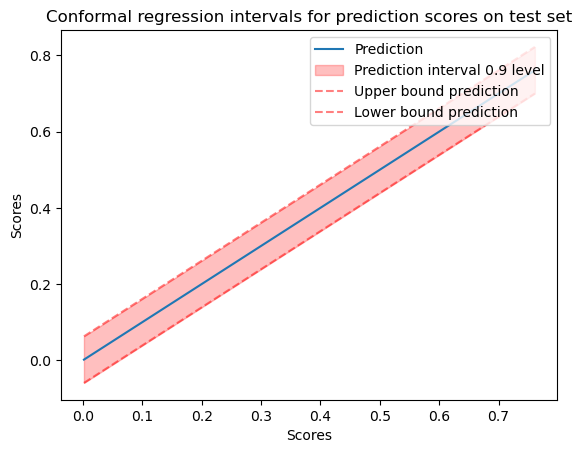

In [3]:
#wykres przedziałów
plt.plot(x,x, label = 'Prediction')
plt.fill_between(x, output[0,:], output[1,:], color='r', alpha=.25, label = f'Prediction interval {np.round(1-alpha,2)} level')
plt.plot(x,output[0,:], label = 'Upper bound prediction', color = 'r', linestyle = '--', alpha = 0.5)
plt.plot(x,output[1,:], label = 'Lower bound prediction', color = 'r', linestyle = '--', alpha = 0.5)
plt.legend(loc = 'upper right')
plt.xlabel('Scores')
plt.ylabel('Scores')
plt.title('Conformal regression intervals for prediction scores on test set')
plt.show()

## CONDITIONAL

In [4]:
#klasa 0
X_train_0 = X_train[y_train==0]
X_train_1 = X_train[y_train==1]
y_train_0 = y_train[y_train==0]
y_train_1 = y_train[y_train==1]
#conformity scores dla zbioru kalibracyjnego
conformity_scores_0 = np.maximum(X_train_0-y_train_0, y_train_0-X_train_0)
conformity_scores_1 = np.maximum(1-X_train_1-y_train_1, y_train_1+X_train_1-1)
#zadany poziom alpha
alpha = 0.1
#liczność próby
n_0 = len(X_train_0)
n_1 = len(X_train_1)
#kwantyl scorów
qhat_0 = np.quantile(conformity_scores_0, np.ceil((n_0+1)*(1-alpha))/n_0)
qhat_1 = np.quantile(conformity_scores_1, np.ceil((n_1+1)*(1-alpha))/n_1)
#regresja dla zbioru testowego
#przedział jedynie dla unikatowych wartości predykcji
x = np.unique(X_test)
output_0 = np.array([x-qhat_0,x+qhat_0])
output_1 = np.array([1-x-qhat_1,1-x+qhat_1])

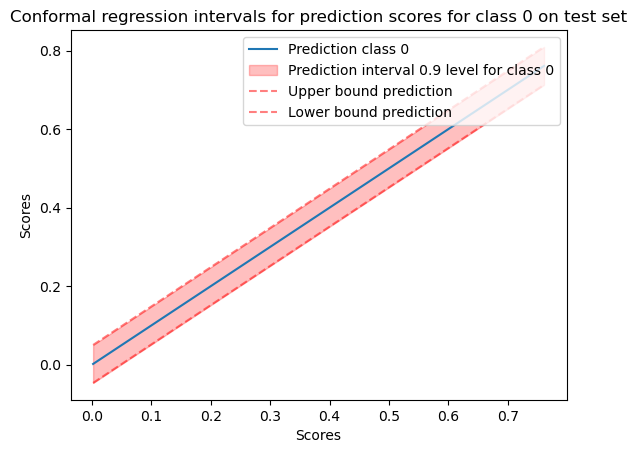

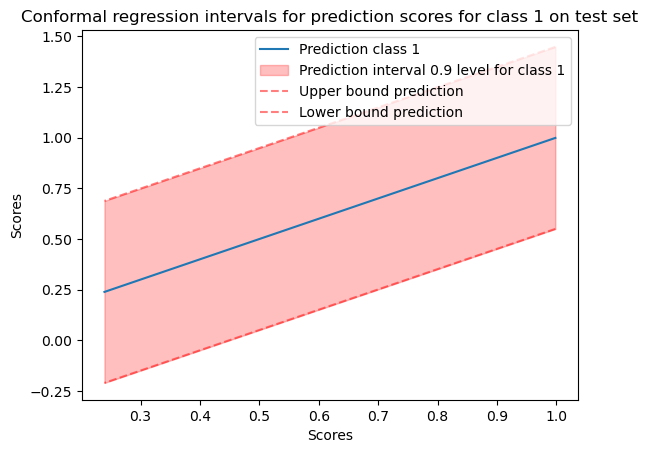

In [5]:
#wykres przedziałów
plt.plot(x,x, label = 'Prediction class 0')
plt.fill_between(x, output_0[0,:], output_0[1,:], color='r', alpha=.25, label = f'Prediction interval {np.round(1-alpha,2)} level for class 0')
plt.plot(x,output_0[0,:], label = 'Upper bound prediction', color = 'r', linestyle = '--', alpha = 0.5)
plt.plot(x,output_0[1,:], label = 'Lower bound prediction', color = 'r', linestyle = '--', alpha = 0.5)
plt.legend(loc = 'upper right')
plt.xlabel('Scores')
plt.ylabel('Scores')
plt.title('Conformal regression intervals for prediction scores for class 0 on test set')
plt.show()
#wykres przedziałów
plt.plot(1-x,1-x, label = 'Prediction class 1')
plt.fill_between(1-x, output_1[0,:], output_1[1,:], color='r', alpha=.25, label = f'Prediction interval {np.round(1-alpha,2)} level for class 1')
plt.plot(1-x,output_1[0,:], label = 'Upper bound prediction', color = 'r', linestyle = '--', alpha = 0.5)
plt.plot(1-x,output_1[1,:], label = 'Lower bound prediction', color = 'r', linestyle = '--', alpha = 0.5)
plt.legend(loc = 'upper right')
plt.xlabel('Scores')
plt.ylabel('Scores')
plt.title('Conformal regression intervals for prediction scores for class 1 on test set')
plt.show()